/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.3509 - loss: 1.7546 - val_accuracy: 0.5479 - val_loss: 1.2539
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5587 - loss: 1.2352 - val_accuracy: 0.6106 - val_loss: 1.1077
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6197 - loss: 1.0681 - val_accuracy: 0.6446 - val_loss: 0.9904
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.6667 - loss: 0.9462 - val_accuracy: 0.6722 - val_loss: 0.9376
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 83ms/step - accuracy: 0.6986 - loss: 0.8665 - val_accuracy: 0.6680 - val_loss: 0.9515
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.7129 - loss: 0.8180 - val_accuracy: 0.6827 - val_loss: 0.9164
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7322 - loss: 0.7644 - val_accuracy: 0.6976 - val_loss: 0.8564
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.7555 - loss: 0.7120 - 

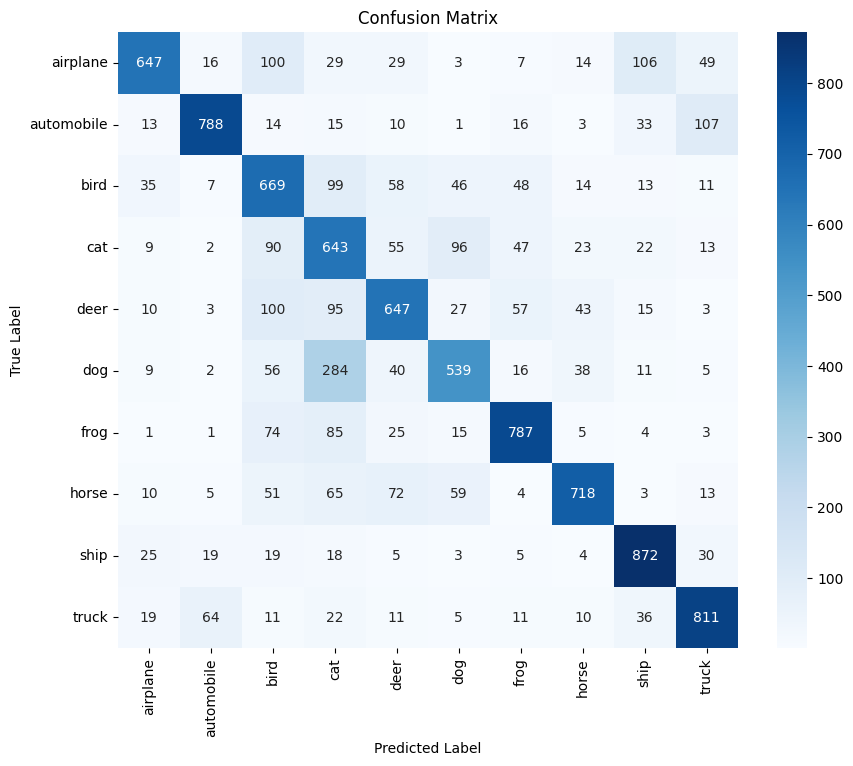

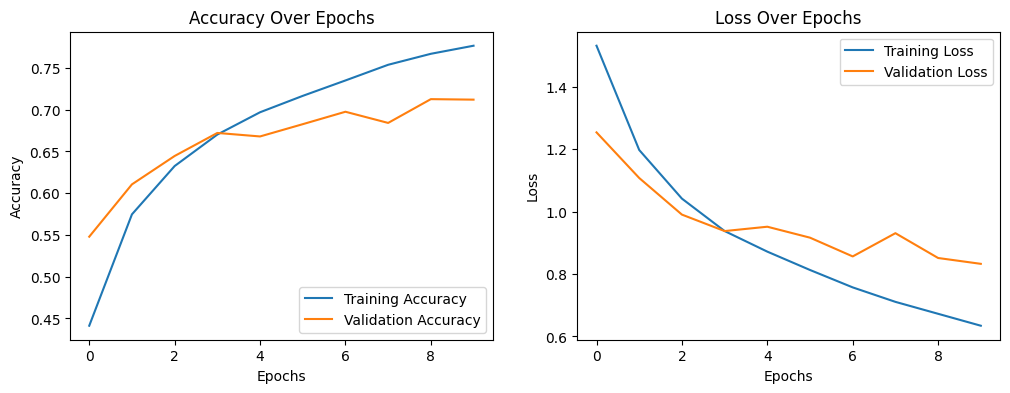

In [ ]:
"""
Este código construye y entrena una red neuronal convolucional (CNN) usando el dataset CIFAR-10 con Keras.
Incluye métricas adicionales y visualización de resultados, incluyendo precisión, recall y matriz de confusión.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocesar los datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)  # for model evaluation

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo con métricas adicionales
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con más épocas para observar la convergencia
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels_categorical))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f'Test accuracy: {test_acc}')

# Obtener predicciones en el conjunto de prueba
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generar reporte de clasificación
print("Classification Report:", classification_report(test_labels, predicted_labels, target_names=[    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]))

# Mostrar matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


